# NFL Superbowl Over The Years

The National Football League(NFL) is a league that consists of 32 teams across the two conferences with 16 teams in each conference who compete against each other.


The NFL Superbowl is the annual game played in the NFL on the first Sunday of February between the two best teams in the League. These two teams are the winners of their respective conferences which is the American Football Conference(AFC) and National Football Conference(NFC). The New England Patriots and the Pittsburgh Stealers hold the record for winning the most Superbowls.

Let's get to know the data a little bit;

There are 10 columns in the dataset and they are :-

1. Date - The date when the Superbowl game was held.
2. SB - Tells which Superbowl it is.
3. Winner - The team that won the Superbowl game that year.
4. Winner Pts - Tells how many points the winning team scored in  the game.
5. Loser - The team that lost the Superbowl game that year.
6. Loser Pts - Tells how many points the losing team scored in  the game.
7. MVP(Most Valuable Player) - This tells us who was the MVP of that Superbowl game. MVP is basically the player who player who played the best in that game.
8. Stadium - The Stadium in which the Superbowl game was played.
9. City - The City in which the Superbowl game was played.
10. State - The State in which the Superbowl game was played.

**As of analysing this data, The Tampa Bay Bucceneers were the winners of the Super Bowl LV for the 2020 season.**
**This data is till the 2019 season where The Kansas City Chiefs were the winners.**

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sb = pd.read_csv('superbowl.csv')

In [3]:
sb.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [4]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


In [5]:
#Here, I have created a few new columns that will help in the analysis
sb['Total Game Points'] = sb['Winner Pts'] + sb['Loser Pts'] # Total number of points scored in total in the game
sb['Date'] = pd.to_datetime(sb['Date']) #Converting the Date column to a datetime object to extract the year from it
sb['Year'] = sb['Date'].dt.year #Year in which the Superbowl was held
sb['Points Difference'] = sb['Winner Pts'] - sb['Loser Pts'] #The difference in the final  points between the winning and losing
#team

In [6]:
sb.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Total Game Points,Year,Points Difference
0,2020-02-02,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,51,2020,11
1,2019-02-03,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,16,2019,10
2,2018-02-04,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,74,2018,8
3,2017-02-05,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,62,2017,6
4,2016-02-07,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,34,2016,14


###### Analysing Performance by each team

In [10]:
by_team = pd.concat([sb['Winner'].value_counts(), sb['Loser'].value_counts()],axis=1)
by_team = by_team.fillna(0)
by_team = by_team.rename(columns={'Winner':'Wins','Loser':'Losses'})
by_team['Total Superbowls'] = by_team['Wins'] + by_team['Losses']
by_team['Win Percentage'] = round(by_team['Wins'] / by_team['Total Superbowls'] * 100)

In [11]:
by_team

,Wins,Losses,Total Superbowls,Win Percentage
New England Patriots,6.0,5.0,11.0,55.0
Pittsburgh Steelers,6.0,2.0,8.0,75.0
Dallas Cowboys,5.0,3.0,8.0,62.0
San Francisco 49ers,5.0,2.0,7.0,71.0
New York Giants,4.0,1.0,5.0,80.0
Green Bay Packers,4.0,1.0,5.0,80.0
Washington Redskins,3.0,2.0,5.0,60.0
Denver Broncos,3.0,5.0,8.0,38.0
Kansas City Chiefs,2.0,1.0,3.0,67.0
Oakland Raiders,2.0,2.0,4.0,50.0


It can be seen that the New England Patriots and Pittsburgh Steelers are the teams that have won the most Superbowls and Pittsburgh's record seems more impressive than the Patriots as they have a win percentage of 75% and have won 6 of their 8 Superbowl games and  lost just 2 whereas the Patriots have played the most Superbowl games and have an almost equal win loss ratio with 6 wins and 5 losses.

In [12]:
by_team[by_team['Wins'] == 0]

,Wins,Losses,Total Superbowls,Win Percentage
Buffalo Bills,0.0,4.0,4.0,0.0
Minnesota Vikings,0.0,4.0,4.0,0.0
Cincinnati Bengals,0.0,2.0,2.0,0.0
Los Angeles Rams,0.0,2.0,2.0,0.0
Atlanta Falcons,0.0,2.0,2.0,0.0
Carolina Panthers,0.0,2.0,2.0,0.0
Arizona Cardinals,0.0,1.0,1.0,0.0
San Diego Chargers,0.0,1.0,1.0,0.0
Tennessee Titans,0.0,1.0,1.0,0.0


Here, we see the teams that have not won the Superbowl till now. It looks the Buffalo Bills and Minnesota Vikings have played the Superbowl 4 times and lost all four times.

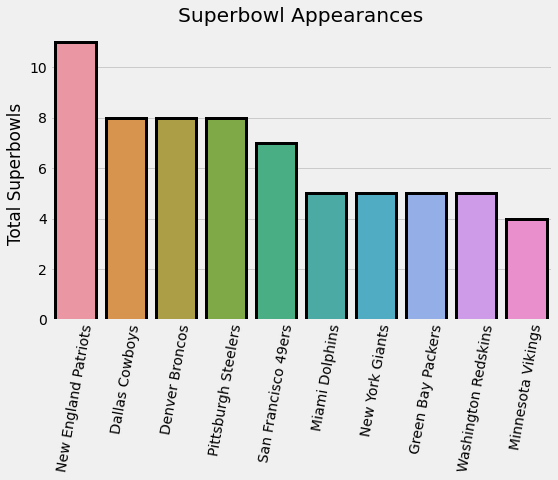

In [15]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
wins = by_team.sort_values(by='Total Superbowls',ascending=False)
sns.barplot(wins['Total Superbowls'].head(10).index, wins['Total Superbowls'].head(10), data= wins, edgecolor = 'black', lw=3)
plt.title('Superbowl Appearances')
plt.xticks(rotation=80);

The New England Patriots have made the most Superbowl appearances followed by the Pittsburgh Steelers and the Dallas Cowboys.

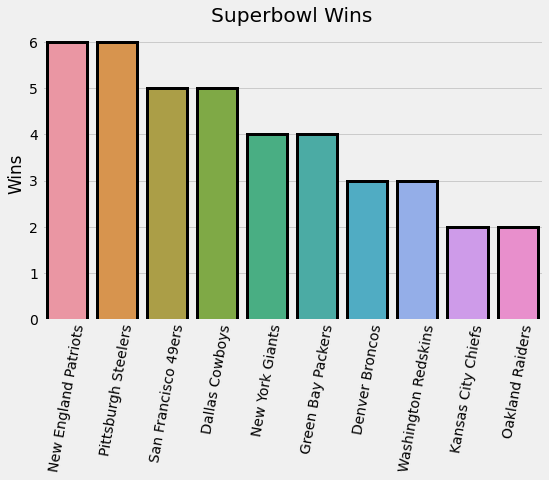

In [208]:
plt.figure(figsize=(8,5))
wins = by_team.sort_values(by='Wins',ascending=False)
sns.barplot(wins['Wins'].head(10).index, wins['Wins'].head(10), data= wins, edgecolor = 'black', lw=3)
plt.title('Superbowl Wins')
plt.xticks(rotation=80);

The New England Patriots and Pittsburgh Steelers hold the record for the most Superbowl wins followed by San Francisco 49ers and the Dallas Cowboys.

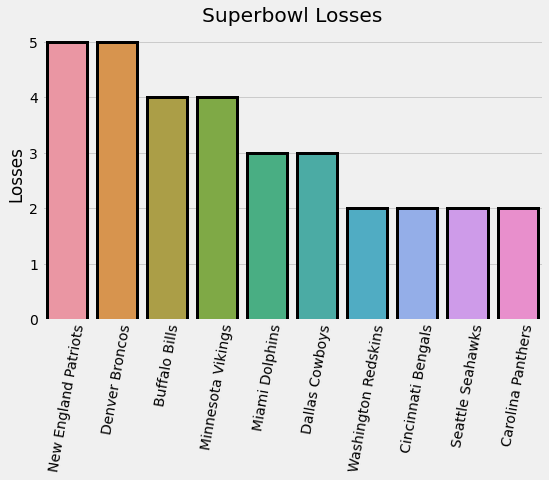

In [207]:
plt.figure(figsize=(8,5))
wins = by_team.sort_values(by='Losses',ascending=False)
sns.barplot(wins['Losses'].head(10).index, wins['Losses'].head(10), data= wins, edgecolor = 'black', lw=3)
plt.title('Superbowl Losses')
plt.xticks(rotation=80);

The New England Patriots look like they hold the record for the most Superbowl losses as well and are followed by the Denver Broncos and the Buffalo Bills.

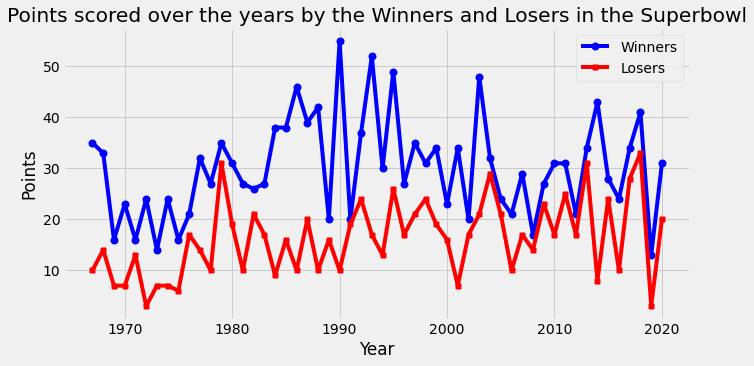

In [196]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(sb['Year'],sb['Winner Pts'], marker = '.', color = 'blue', label = 'Winners', mew=5)
ax.plot(sb['Year'],sb['Loser Pts'], marker = '+', color = 'red', label = 'Losers', mew=5)

ax.set_xlabel('Year')
ax.set_ylabel('Points')
ax.set_title('Points scored over the years by the Winners and Losers in the Superbowl')
ax.legend();

In [167]:
sb[sb['Winner Pts'] == sb['Winner Pts'].max()][['Winner','SB','Winner Pts','Year']]

,Winner,SB,Winner Pts,Year
30,San Francisco 49ers,XXIV (24),55,1990


The San Francisco 49ers have scored the most points by a team that has won the Superbowl and that was in 1990 and it can be seen in the graph as well.

In [168]:
sb[sb['Loser Pts'] == sb['Loser Pts'].max()][['Loser','SB','Loser Pts','Year']]

,Loser,SB,Loser Pts,Year
2,New England Patriots,LII (52),33,2018


The New England Patriots have scored the most points by a losing team in the Superbowl in 2018.

In [194]:
sb[sb['Loser Pts'] == sb['Loser Pts'].min()][['Loser','SB','Loser Pts','Year']]

,Loser,SB,Loser Pts,Year
1,Los Angeles Rams,LIII (53),3,2019
48,Miami Dolphins,VI (6),3,1972


The Los Angeles Rams and Miami Dolphins have the least points in a Superbowl with 3 points each.

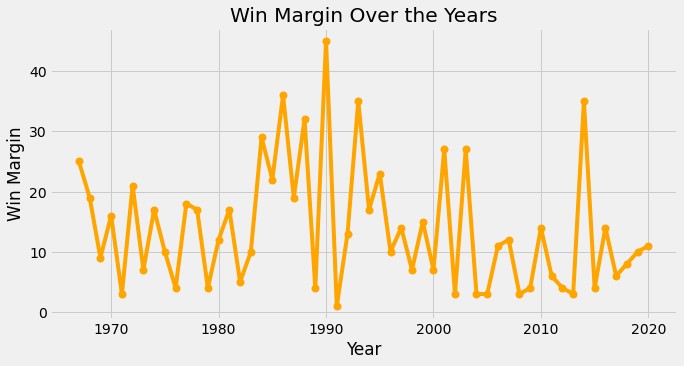

In [170]:
plt.figure(figsize=(10,5))
plt.plot(sb['Year'], sb['Points Difference'], marker = '.', color = 'orange', mew=5)
plt.xlabel('Year')
plt.ylabel('Win Margin')
plt.title('Win Margin Over the Years');

In [13]:
sb['Match'] = sb['Winner'] + ' vs ' +  sb['Loser']
sb_2 = sb.sort_values(by='Points Difference',ascending=False)
sb_2 = sb_2.head(5)

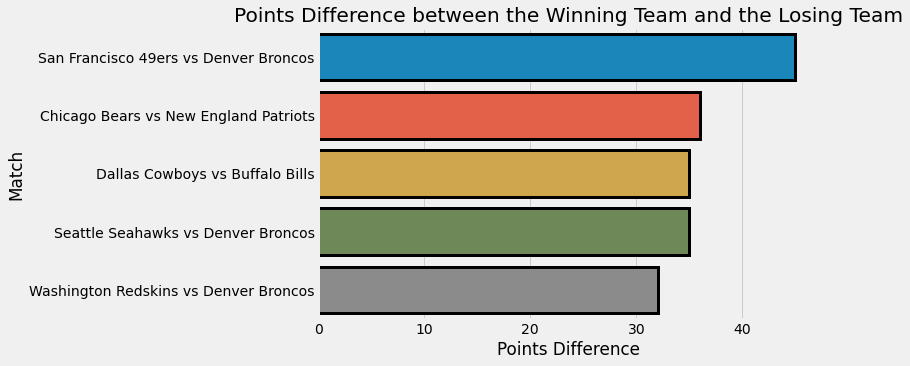

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Points Difference', y = 'Match', data = sb_2, edgecolor = 'black', lw=3);
plt.title('Points Difference between the Winning Team and the Losing Team');

In [18]:
sb[(sb['Winner'] == 'San Francisco 49ers') & (sb['Loser'] == 'Denver Broncos')]

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Total Game Points,Year,Points Difference,Match
30,1990-01-28,XXIV (24),San Francisco 49ers,55,Denver Broncos,10,Joe Montana+,Louisiana Superdome,New Orleans,Louisiana,65,1990,45,San Francisco 49ers vs Denver Broncos


We can see that the Superbowl XXIV game between San Francisco 49ers and Denver Broncos in 1990 had the most difference in points between the winning and the losing team. The 49ers scored 55 points whereas the Broncos scored just 10 points.

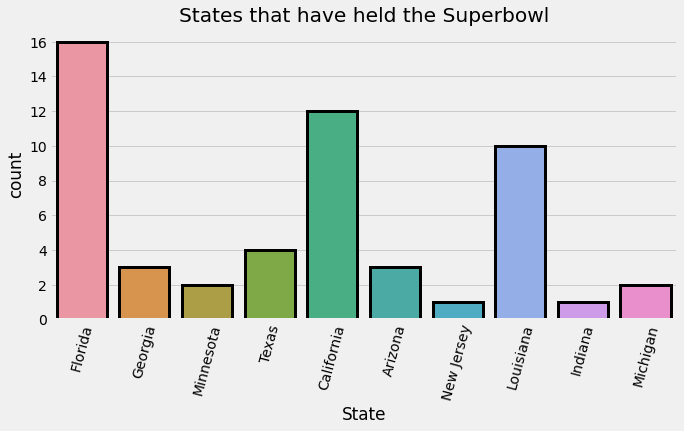

In [200]:
plt.figure(figsize=(10,5))
sns.countplot(x='State', data=sb, edgecolor = 'black', lw=3)
plt.title('States that have held the Superbowl')
plt.xticks(rotation=75);

Florida, california and Lousiana are the states that have held the most number of Superbowls.

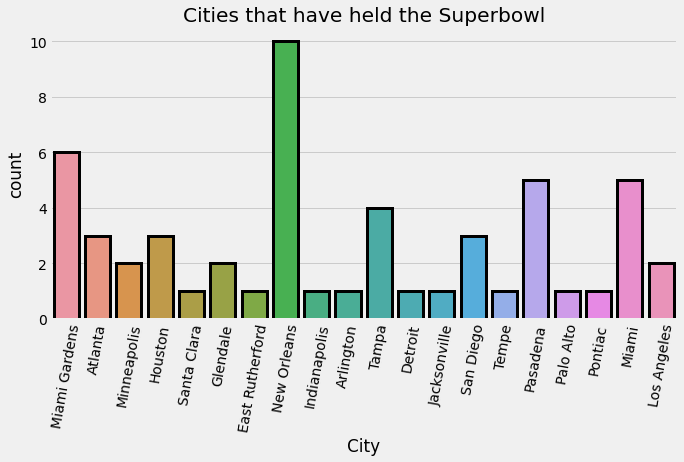

In [203]:
plt.figure(figsize=(10,5))
sns.countplot(x='City', data=sb, edgecolor = 'black', lw=3)
plt.title('Cities that have held the Superbowl')
plt.xticks(rotation=80);

New Orleans, Miami Garders, Pasadena, Miami and Tampa are some of the cities where the Superbowl has taken place most number of times.

In [175]:
mvp = pd.DataFrame(sb['MVP'].value_counts()).reset_index()
mvp.rename(columns = {'index': 'MVP', 'MVP' : 'MVP Wins'},inplace = True)

mvp.sort_values(by='MVP Wins',ascending = False, inplace = True)
mvp = mvp.head()

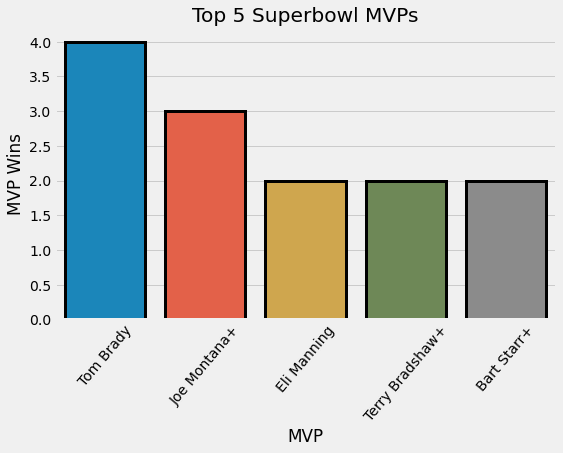

In [180]:
plt.figure(figsize=(8,5))
sns.barplot(x='MVP',y='MVP Wins',data=mvp, edgecolor = 'black', lw=3)
plt.title('Top 5 Superbowl MVPs')
plt.xticks(rotation=50);

The Superbowl MVP award is given to the player who has played the best in that particular Superbowl game. It is awarded based on a number of metrics like Most yards covered, number of passes made, number of passes that resulted in a touchdown and more. Although it is the Quarterback who wins the award most times, there have been 8 occasions wherein it was awarded to players playing in a different position. 

Here we see the Top 5 Superbowl MVP winners and Tom Brady who at this moment plays for Tampa Bay Bucceneers has won the most. Here, it is mentioned as 4 as the data as mentioned above is till the 2019 season. These 4 wins came when he was playing for The New England Patriots. He won the Superbowl MVP for the 2020 Season when the Tampa Bay Buccaneers beat the Kansas City Chiefs 31-9 during the Superbowl LV. In total as of the present moment, he has 5 Superbowl MVP wins.

In [181]:
stadium = pd.DataFrame(sb['Stadium'].value_counts()).reset_index()
stadium.rename(columns = {'index':'Stadium', 'Stadium': 'No of times hosted'},inplace=True)

stadium.sort_values(by='No of times hosted',ascending=False, inplace=True)
stadium = stadium.head(10)

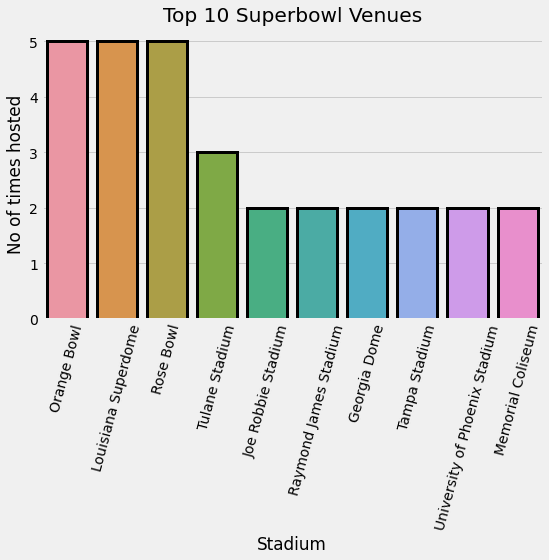

In [195]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stadium',y='No of times hosted',data=stadium, edgecolor = 'black', lw=3)
plt.title('Top 10 Superbowl Venues')
plt.xticks(rotation=75);

The Orange Bowl, Lousiana Superdome and Rose Bowl are the stadiums that have hosted the Superbowl most number of times with 5.

## Conclusion

So that's it from my analysis of the Superbowl over the years. This must give one enough knowledge about the Superbowl and how it has gone about over the years and what it is all about! 

Enjoy the game!

**Ready,Set,Hut!**